# Importing the Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [134]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('gld_price_data.csv')

In [135]:
# print first 5 rows in the dataframe
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,1.475492,NaN
3,1/7/2008,1416.180054,NaN,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2671 non-null   object 
 1   SPX      2663 non-null   float64
 2   GLD      2664 non-null   float64
 3   USO      2668 non-null   float64
 4   SLV      2669 non-null   float64
 5   EUR/USD  2670 non-null   float64
dtypes: float64(5), object(1)
memory usage: 125.3+ KB


In [137]:
df.isnull().sum()

Date       0
SPX        8
GLD        7
USO        3
SLV        2
EUR/USD    1
dtype: int64

In [138]:
# print last 5 rows of the dataframe
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2666,2/22/2013,1515.599908,152.970000,33.599998,27.830000,1.319430
2667,2/25/2013,1487.849918,154.339996,33.209999,28.070000,1.319592
2668,2/26/2013,1496.939941,156.220001,33.313000,28.410000,1.306506
2669,2/27/2013,1515.989990,154.570007,33.400002,28.010000,1.306592
2670,2/28/2013,1514.680054,153.000000,33.061000,27.540001,1.310510


In [139]:
# number of rows and columns
df.shape

(2671, 6)

In [140]:
# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2671 non-null   object 
 1   SPX      2663 non-null   float64
 2   GLD      2664 non-null   float64
 3   USO      2668 non-null   float64
 4   SLV      2669 non-null   float64
 5   EUR/USD  2670 non-null   float64
dtypes: float64(5), object(1)
memory usage: 125.3+ KB


In [141]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        8
GLD        7
USO        3
SLV        2
EUR/USD    1
dtype: int64

In [142]:
# statistical Measures of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2663.0,1703.211940,503.517560,676.530029,1284.924988,1795.849976,2067.764893,2872.870117
GLD,2664.0,122.675649,21.751484,70.000000,111.977502,120.940002,129.130005,184.589996
USO,2668.0,31.712597,18.678601,7.960000,16.775001,34.004999,37.680000,117.480003
SLV,2669.0,19.791443,6.685690,1.475492,15.620000,17.370001,20.900000,47.259998
EUR/USD,2670.0,1.283688,0.128399,1.039047,1.177777,1.304053,1.368153,1.598798


In [143]:
df.mean()

C:\Users\OMSAI~1\AppData\Local\Temp/ipykernel_32148/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


SPX        1703.211940
GLD         122.675649
USO          31.712597
SLV          19.791443
EUR/USD       1.283688
dtype: float64

In [168]:
df["SPX"].fillna(df['SPX'].mean(),inplace = True)
df["GLD"].fillna(df['GLD'].mean(),inplace = True)
df["USO"].fillna(df['USO'].mean(),inplace = True)
df["SLV"].fillna(df['SLV'].mean(),inplace = True)
df["EUR/USD"].fillna(df['EUR/USD'].mean(),inplace = True)

In [169]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [170]:
# drop the "date",after the cor
new_df = df.drop(['Date'], axis=1)

In [171]:
new_df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1411.630005,85.129997,77.309998,1.475492,1.283688
3,1416.180054,122.675649,75.500000,15.053000,1.468299
4,1390.189941,86.779999,76.059998,15.590000,1.557099


In [172]:
# getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,1703.211940,122.675649,31.712597,19.791443,1.283688
std,502.762660,21.722952,18.668105,6.683185,0.128375
min,676.530029,70.000000,7.960000,1.475492,1.039047
25%,1285.729981,112.024998,16.780001,15.620000,1.177794
50%,1792.810059,120.940002,34.000000,17.370001,1.304002
75%,2067.560059,129.099999,37.674999,20.900000,1.368129
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation:
1. Positive Correlation
2. Negative Correlation 

In [173]:
correlation = new_df.corr()

<AxesSubplot:>

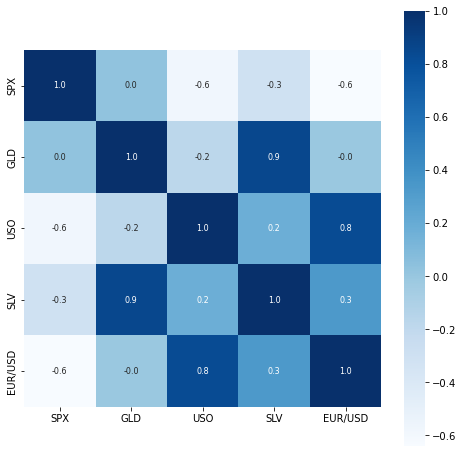

In [174]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [175]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.031287
GLD        1.000000
USO       -0.175012
SLV        0.858430
EUR/USD   -0.007123
Name: GLD, dtype: float64


D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

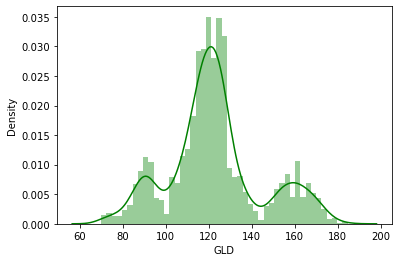

In [176]:
# checking the distribution of the GLD Price
sns.distplot(new_df['GLD'],color='green')

# Splitting the Features and Target

In [177]:
x = new_df.drop(['GLD'],axis=1)
y = new_df['GLD']

In [178]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180000,1.471692
1,1447.160034,78.370003,15.285000,1.474491
2,1411.630005,77.309998,1.475492,1.283688
3,1416.180054,75.500000,15.053000,1.468299
4,1390.189941,76.059998,15.590000,1.557099
...,...,...,...,...
2666,1515.599908,33.599998,27.830000,1.319430
2667,1487.849918,33.209999,28.070000,1.319592
2668,1496.939941,33.313000,28.410000,1.306506
2669,1515.989990,33.400002,28.010000,1.306592


In [179]:
y

0        84.860001
1        85.570000
2        85.129997
3       122.675649
4        86.779999
           ...    
2666    152.970000
2667    154.339996
2668    156.220001
2669    154.570007
2670    153.000000
Name: GLD, Length: 2671, dtype: float64

# Splitting into Training data and Test Data

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

# Model Training: Random Forest Regressor

In [181]:
model = RandomForestRegressor(n_estimators=100)

In [182]:
model

RandomForestRegressor()

In [183]:
# training the model
model.fit(x_train, y_train)

RandomForestRegressor()

# Model Evaluation

In [185]:
# prediction on Test Data
y_pred = model.predict(x_test)

In [186]:
y_pred

array([111.98830138,  87.97380123, 109.50629937, 125.53330116,
       118.73959949, 114.8713987 , 127.61100127, 125.83070216,
       129.63869857,  79.5361987 , 127.59960054, 159.79150195,
       147.61170027, 121.83720165, 112.0742007 , 123.52369827,
       168.26349869,  94.2019821 , 120.23100163, 126.96020281,
       119.76940191, 122.61349971, 130.55640084, 115.18799937,
       122.4507981 , 118.89249873, 126.9358976 , 122.33689926,
       126.91620107, 126.41939828, 113.0647013 , 128.18460095,
       167.15120217,  87.41049898, 111.36049999, 125.73179803,
        87.8813994 ,  91.85979932, 127.69629709, 126.07940118,
       118.10029832,  89.27522533, 125.34180108, 105.63490032,
       135.6150013 , 125.90209963, 159.78079985, 150.76789869,
       117.65220002, 119.0692989 , 110.28329843, 119.61399981,
       122.33689926, 128.20940072, 159.7489013 , 107.93169729,
       119.45809962, 152.92399992,  89.68819887, 119.71399775,
        97.41290054, 114.01529941,  98.08819998, 121.79

In [187]:
# R squared error
score = metrics.r2_score(y_test, y_pred)

In [188]:
score

0.9845857793153872